## 10 possible stats/vizs

1. time line of wins & losses
    - shortest/longest longest streak before loss
    - x axis date, y axis point differential
2. dig into territory and possession
3. passing & offloads
4. attack - kicks from hand, meters, runs, clean breaks, defenders beaten
5. set piece play
6. penalities
7. tackling
8. breakdown effectiveness
9. location, time, tourney
10. points, tries, penalties



| Column                | Num Null |
|:----------------------|:---------|
| nz_drop_goal_miss     | 5        |
| nz_drop_goal_att      | 6        |
| opp_drop_goal_miss    | 6        |
| opp_drop_goal_att     | 6        |
| nz_passes             | 8        |
| opp_passes            | 8        |
| nz_possession_1h      | 29       |
| nz_possession_2h      | 29       |
| nz_possession_total   | 19       |
| opp_possession_1h     | 29       |
| opp_possession_2h     | 29       |
| opp_possession_total  | 19       |
| nz_territory_1h       | 32       |
| nz_territory_2h       | 32       |
| nz_territory_total    | 22       |
| opp_territory_1h      | 32       |
| opp_territory_2h      | 32       |
| opp_territory_total   | 22       |
| nz_maul_perc          | 20       |
| opp_maul_perc         | 11       |
| nz_freekick_conceded  | 90       |
| opp_freekick_conceded | 90       |

### load data

In [3]:
ls

LICENSE                  complete_df.csv          statsguru-query.png
README.md                eda.ipynb                statsguru_scraper_ex.py
checklist.md             infograph_examples/      test.csv
clean_data.py            pca.py                   visualizations.ipynb
clean_df_complete.csv    scrape.py


In [203]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

plt.style.use('ggplot')

In [14]:
df = pd.read_csv('clean_df_complete.csv', parse_dates=['date'])

In [16]:
dfW = df[df.result == 'W']
dfL = df[df.result != 'W']

print('Wins DF shape: ', dfW.shape)
print('Loses DF shape: ', dfL.shape)

Wins DF shape:  (117, 113)
Loses DF shape:  (20, 113)


### timeline of wins & losses

In [61]:
df1 = df[['date','point_diff', 'result', 'year']]
df1.set_index('date', inplace=True)
print(df1.head())

dfW1 = df1[df1.result == 'W']
dfL1 = df1[df1.result == 'L']
dfD1 = df1[df1.result == 'D']

            point_diff result  year
date                               
2008-06-21          32      W  2008
2008-07-05          11      W  2008
2008-07-12          -2      L  2008
2008-07-26         -15      L  2008
2008-08-02          29      W  2008


In [63]:
df09 = df1[df1.year == 2009]
print(df09.head())

dfW09 = df09[df09.result == 'W']
dfL09 = df09[df09.result == 'L']
dfD09 = df09[df09.result == 'D']

            point_diff result  year
date                               
2009-06-13          -5      L  2009
2009-06-20           4      W  2009
2009-06-27          21      W  2009
2009-07-18           6      W  2009
2009-07-25          -9      L  2009


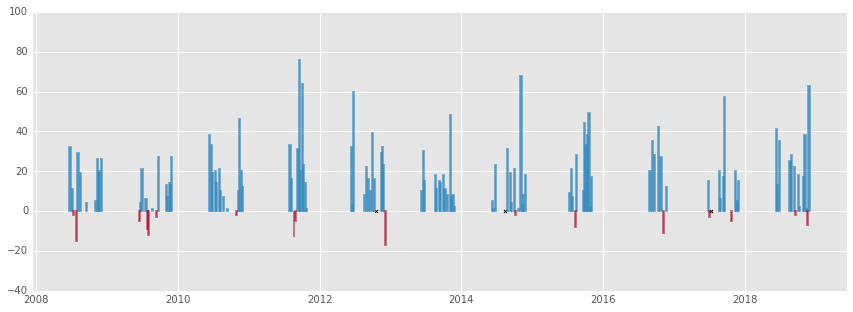

In [204]:
from IPython.core.pylabtools import figsize

colors = ["#348ABD", "#A60628"]

plt.figure(figsize=(13,5))
plt.bar(dfW1.index, dfW1.point_diff, width=6, alpha=.6, color=colors[0],
        edgecolor=colors[0],
        linewidth=2)
plt.bar(dfL1.index, dfL1.point_diff, width=5, alpha=.5, color=colors[1],
        edgecolor=colors[1],
        linewidth=2) 
plt.scatter(dfD1.index, dfD1.point_diff, s=20, c='black', marker='X')

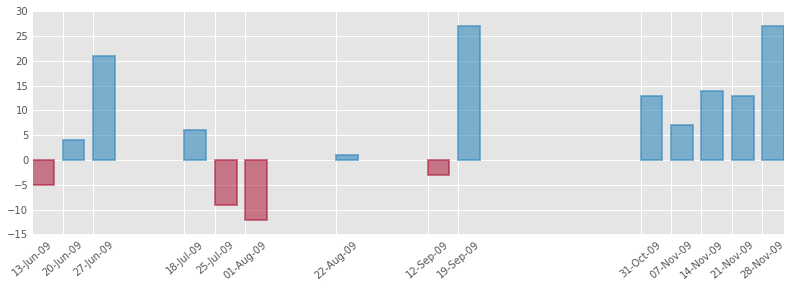

In [205]:
from IPython.core.pylabtools import figsize
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%d-%b-%y')

colors = ["#348ABD", "#A60628"]
_xticks = [df09.index.min(), df09.index.max()]

fig, ax = plt.subplots(figsize=(12,4))
# plt.figure()
ax.bar(dfW09.index, dfW09.point_diff, width=5, alpha=.6, color=colors[0],
        edgecolor=colors[0],
        linewidth=2)
ax.bar(dfL09.index, dfL09.point_diff, width=5, alpha=.5, color=colors[1],
        edgecolor=colors[1],
        linewidth=2) 
ax.scatter(dfD09.index, dfD09.point_diff, s=20, c='black', marker='X')
# ax.set_xlim('05-Jun-09', '05-Dec-09')
ax.set_xticks(df09.index)
ax.set_xticklabels(df09.index, rotation=40)
ax.xaxis.set_major_formatter(myFmt)

Use the above plots as general framework. Need to clean up design, condense space between date gaps, or plot sequence of individiual years.

### territory & possession 

In [85]:
dfW[['nz_territory_total', 'opp_territory_total']].describe()

,nz_territory_total,opp_territory_total
count,98.00000,98.00000
mean,0.52398,0.47602
std,0.10225,0.10225
min,0.30000,0.20000
25%,0.44000,0.41000
50%,0.53500,0.46500
75%,0.59000,0.56000
max,0.80000,0.70000


In [86]:
dfL[['nz_territory_total', 'opp_territory_total']].describe()

,nz_territory_total,opp_territory_total
count,17.000000,17.000000
mean,0.521765,0.478235
std,0.107426,0.107426
min,0.330000,0.210000
25%,0.470000,0.420000
50%,0.510000,0.490000
75%,0.580000,0.530000
max,0.790000,0.670000


In [97]:
statsW = dfW[['nz_possession_total', 'opp_possession_total']].describe()
statsW

,nz_possession_total,opp_possession_total
count,101.000000,101.000000
mean,0.522178,0.477822
std,0.100584,0.100584
min,0.340000,0.000000
25%,0.450000,0.420000
50%,0.520000,0.480000
75%,0.580000,0.550000
max,1.000000,0.660000


In [90]:
statsL = dfL[['nz_possession_total', 'opp_possession_total']].describe()

In [91]:
print(type(statsW))
statsW.head()

<class 'pandas.core.frame.DataFrame'>


,nz_possession_total,opp_possession_total
count,101.000000,101.000000
mean,0.522178,0.477822
std,0.100584,0.100584
min,0.340000,0.000000
25%,0.450000,0.420000


In [100]:
print(statsW.loc['std'])
print(statsW.loc['mean'])

nz_possession_total     0.100584
opp_possession_total    0.100584
Name: std, dtype: float64
nz_possession_total     0.522178
opp_possession_total    0.477822
Name: mean, dtype: float64


In [176]:
print(statsW.loc['50%'])
print(statsW.loc['75%'])

nz_possession_total     0.52
opp_possession_total    0.48
Name: 50%, dtype: float64
nz_possession_total     0.58
opp_possession_total    0.55
Name: 75%, dtype: float64


0.13


([<matplotlib.axis.XTick at 0x11c682b00>,
 <a list of 3 Text xticklabel objects>)

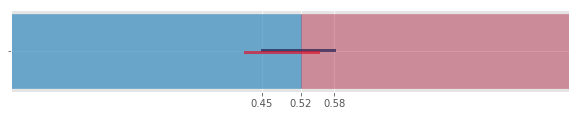

In [191]:
_xerr=statsW.loc['75%'][0]-statsW.loc['25%'][0]
print(_xerr)

_x = np.arange(.45, .59, .01)
_xO = np.arange(.42, .55, .01)
_y = np.ones(_x.shape[0])
_yO = np.ones(_xO.shape[0])
_y += .01
_yO -= .01


plt.figure(figsize=(10,1.5))
plt.barh(1,statsW.loc['50%'][0], color=colors[0], 
        edgecolor=colors[0],
        linewidth=.5,
        alpha=0.7)
plt.barh(1,statsW.loc['50%'][1], left=statsW.loc['50%'][0], color=colors[1], 
         edgecolor=colors[1],
        linewidth=.5,
        alpha=0.4)
plt.plot(_x, _y, color='#201E50', linewidth=3, alpha=0.7)
plt.plot(_xO, _yO, color='#DB162F', linewidth=3, alpha=0.7)
plt.xlim(0,1)
plt.yticks([1],[''])
plt.xticks([statsW.loc['25%'][0], statsW.loc['50%'][0], statsW.loc['75%'][0]])

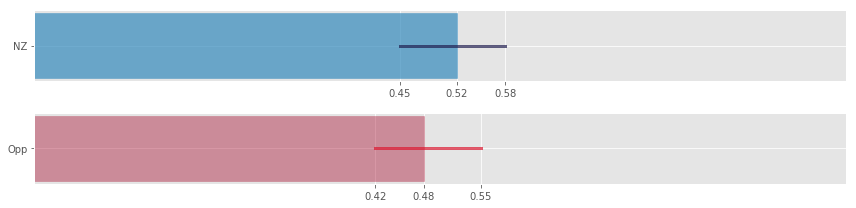

In [192]:
_xerr=statsW.loc['75%'][0]-statsW.loc['25%'][0]

_x = np.arange(.45, .59, .01)
_xO = np.arange(.42, .55, .01)
_y = np.ones(_x.shape[0])
_yO = np.ones(_xO.shape[0])

plt.figure(figsize=(12,3))

ax = plt.subplot(211)

plt.barh(1,statsW.loc['50%'][0], color=colors[0], 
        edgecolor=colors[0],
        linewidth=.5,
        alpha=0.7)
plt.plot(_x, _y, color='#201E50', linewidth=3, alpha=0.7)
plt.xlim(0,1)
plt.yticks([1],['NZ'])
plt.xticks([statsW.loc['25%'][0], statsW.loc['50%'][0], statsW.loc['75%'][0]])

ax = plt.subplot(212)
plt.barh(1,statsW.loc['50%'][1], color=colors[1], 
         edgecolor=colors[1],
        linewidth=.5,
        alpha=0.4)
plt.plot(_xO, _yO, color='#DB162F', linewidth=3, alpha=0.7)
plt.xlim(0,1)
plt.yticks([1],['Opp'])
plt.xticks([statsW.loc['25%'][1], statsW.loc['50%'][1], statsW.loc['75%'][1]])

plt.tight_layout()

In [ ]:
dfW['nz_final_score'].hist(bins=100)
dfL['nz_final_score'].hist(bins=100)

In [ ]:
dfW['point_diff'].hist(bins=50)
dfL['point_diff'].hist(bins=50)

In [ ]:
dfW['nz_tries'].hist(bins=20)
dfL['nz_tries'].hist(bins=20)

In [ ]:
dfW.nz_offloads.hist(bins=50)
dfL.nz_offloads.hist(bins=50)

In [ ]:
dfW.turnover_diff.hist(bins=50)
dfL.turnover_diff.hist(bins=50)

In [ ]:
dfW.nz_territory_total.hist(bins=50)
dfL.nz_territory_total.hist(bins=50)

In [ ]:
dfW.opp_possession_total.hist(bins=50)
dfL.opp_possession_total.hist(bins=50)

In [ ]:
dfW.opp_territory_1h.hist(bins=50)
dfL.opp_territory_1h.hist(bins=50)

In [ ]:
dfW.opp_territory_2h.hist(bins=50)
dfL.opp_territory_2h.hist(bins=50)

In [ ]:
dfL.opp_territory_total.hist(bins=50)
dfL.nz_territory_total.hist(bins=50)

In [ ]:
dfW[['nz_possession_1h'       
,'nz_possession_2h'          
,'nz_possession_total'     
,'opp_possession_1h'       
,'opp_possession_2h'         
,'opp_possession_total'      
,'nz_territory_1h'           
,'nz_territory_2h'           
,'nz_territory_total'        
,'opp_territory_1h'          
,'opp_territory_2h'          
,'opp_territory_total']].head()

In [ ]:
avg_pos_1h_w = dfW['nz_possession_1h'].mean()
avg_pos_2h_w = dfW['nz_possession_2h'].mean()
avg_pos_tot_w = dfW['nz_possession_total'].mean()

avg_pos_1h_l = dfL['nz_possession_1h'].mean()
avg_pos_2h_l = dfL['nz_possession_2h'].mean()
avg_pos_tot_l = dfL['nz_possession_total'].mean()

print(f'avg pos 1h win: {round(avg_pos_1h_w,3)}')
print(f'avg pos 2h win: {round(avg_pos_2h_w,3)}')
print(f'avg pos total win: {round(avg_pos_tot_w,3)}')
print(f'avg pos 1h loss: {round(avg_pos_1h_l,3)}')
print(f'avg pos 2h loss: {round(avg_pos_2h_l,3)}')
print(f'avg pos total loss: {round(avg_pos_tot_l,3)}')